In [1]:
from sklearn import svm, datasets 
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

#df = pd.read_csv(r'G:\MScProject\data\raw_data.csv')
# for c in df.columns:
#     print(c)

In [2]:
#!pip install glassnode


In [3]:
from  glassnode  import  GlassnodeClient
import pandas as pd

api_key = "24vuPNOyd3ciclDMDBqFCoQFykc"
client = GlassnodeClient(api_key)
since = 1546272000 # 1 1 2019
until = 1646064000 # 1 3 2022
resolution = "24h"
params = {"a": "BTC", "s": since, "u": until, "i": resolution}
indlist = [['market','price_usd_close'],
          ['addresses','min_1_count'],
          ['addresses','min_10_count'],
          ['addresses','min_100_count'],
          ['addresses','min_1k_count'],
          ['addresses','min_10k_count'],
          ['addresses','active_count'],
          ['addresses','new_non_zero_count'],
           ['addresses','receiving_count'],
           #cant use
           ['distribution','supply_contracts'],
           ['distribution','balance_exchanges'],
           ['distribution','balance_exchanges_relative'],
           ['distribution','exchange_net_position_change'],
           #cant use
           ['supply','rcap_hodl_waves'],
           ['supply','active_3m_6m'],
           ['supply','active_6m_12m'],
           ['supply','active_1y_2y'],
           ['supply','active_2y_3y'],
           ['supply','active_3y_5y'],
           ['supply','profit_relative'],
           ['supply','profit_sum'],
           ['supply','loss_sum'],
           #do not have this data
           ['supply','sth_lth_realized_value_ratio'],
           #cant use
           ['transactions','count'],
           ['transactions','transfers_volume_exchanges_net'],
           ['market','mvrv'],
           ['market','mvrv_z_score'],
           ['market','marketcap_realized_usd'],
           ['indicators','pi_cycle_top'],
           ['indicators','net_unrealized_profit_loss'],
           ['indicators','seller_exhaustion_constant'],
           ['indicators','realized_profits_to_value_ratio'],
           ['indicators','realized_profit'],
           ['indicators','realized_loss'],
           ['indicators','ssr'],
           ['indicators','ssr_oscillator'],
           ['lightning','network_capacity_sum'],
           #cant use this data
           ['protocols','uniswap_volume_sum']
           #['',''],          
          ]


def data_from_api(indlist):
    data=[]
    for i in range(len(indlist)):
        try:
            label = indlist[i][1]
            db = client.get(indlist[i][0],indlist[i][1],params)
            #convert from list of dictionaries to data frame
            df = pd.DataFrame.from_dict(db,orient='columns')
            #setup columns name
            df.columns=['time',label]
            #fixed index
            df.set_index('time', inplace = True)
            data.append(df)
            data_df = pd.concat(data,axis = 1)
        except:
            print('data can be used',label)
            
    data_df['time'] = data_df.index
    
    data_df['time_real'] = pd.to_datetime(data_df['time'],unit = 's')
    #set time as the first columns
    data_df.set_index('time_real',inplace = True)
    #set time as the first columns
    #data_df= data_df[['time']+[col for col in data_df if col != 'time']]
    #df = df[ ['mean'] + [ col for col in df.columns if col != 'mean' ] ]
    #drop time and time_real
    data_df = data_df.drop(columns = ['time'])
    print(data_df.columns)
    print(data_df.index)
    
    return data_df

            
df = data_from_api(indlist)

df

df.to_csv(r'/Users/song/Desktop/MScProject/data/df_raw.csv', index = False)
# /Users/song/Desktop/MScProject/data/norm_df.csv

    

data can be used supply_contracts
data can be used sth_lth_realized_value_ratio
data can be used uniswap_volume_sum
Index(['price_usd_close', 'min_1_count', 'min_10_count', 'min_100_count',
       'min_1k_count', 'min_10k_count', 'active_count', 'new_non_zero_count',
       'receiving_count', 'balance_exchanges', 'balance_exchanges_relative',
       'exchange_net_position_change', 'rcap_hodl_waves', 'active_3m_6m',
       'active_6m_12m', 'active_1y_2y', 'active_2y_3y', 'active_3y_5y',
       'profit_relative', 'profit_sum', 'loss_sum', 'count',
       'transfers_volume_exchanges_net', 'mvrv', 'mvrv_z_score',
       'marketcap_realized_usd', 'pi_cycle_top', 'net_unrealized_profit_loss',
       'seller_exhaustion_constant', 'realized_profits_to_value_ratio',
       'realized_profit', 'realized_loss', 'ssr', 'ssr_oscillator',
       'network_capacity_sum'],
      dtype='object')
DatetimeIndex(['2018-12-31', '2019-01-01', '2019-01-02', '2019-01-03',
               '2019-01-04', '2019-01-0

In [4]:
# df = pd.read_csv(r'/Users/song/Desktop/MScProject/data/df_raw.csv')

In [5]:
# df.columns

In [6]:
# df.head(3)


In [7]:
# 选出 'rcap_hodl_waves','pi_cycle_top','ssr' 中的数据
df = df.iloc[:,:].drop(columns = ['rcap_hodl_waves','pi_cycle_top','ssr'])

#features 处理
df['1-10-address'] =   df['min_1_count'] - df['min_10_count']
df['10-100-address'] = df['min_10_count'] - df['min_100_count']
df['100-1k-address'] = df['min_100_count'] - df['min_1k_count']
df['1k-10k-address'] = df['min_1k_count'] - df['min_10k_count']
df['10k+address'] =    df['min_10k_count']

df["per_1_d"] = df['price_usd_close'].pct_change(1).shift(periods = -1)
df["per_3_d"] = df['price_usd_close'].pct_change(3).shift(periods = -3)
df["per_7_d"] = df['price_usd_close'].pct_change(7).shift(periods = -7)
df["per_15_d"] = df['price_usd_close'].pct_change(15).shift(periods = -15)
df["per_30_d"] = df['price_usd_close'].pct_change(30).shift(periods = -30)
df['price_back_1_d'] = df['price_usd_close'].shift(periods=1)
df['price_back_3_d'] = df['price_usd_close'].shift(periods=3)
df['price_back_7_d'] = df['price_usd_close'].shift(periods=7)
df['price_back_15_d'] = df['price_usd_close'].shift(periods=15)
df['price_back_30_d'] = df['price_usd_close'].shift(periods=30)
df['SMA_3'] = df['price_usd_close'].rolling(window=3).mean()
df['SMA_7'] = df['price_usd_close'].rolling(window=7).mean()
df['up_down'] = df["per_1_d"]

#condition = [(abs(df["per_1_d"])<0),(df["per_1_d"]>=0)]
condition = [(df["per_1_d"])<= 0.0,(df["per_1_d"]>0.0)]
values = [-1,1]
import numpy as np
df['up_do_1d_2class'] = np.select(condition,values)

#condition = [(abs(df["per_1_d"])<0),(df["per_1_d"]>=0)]
condition = [(abs(df["per_1_d"])<0.005),(df["per_1_d"]<=-0.005),(df["per_1_d"]>=0.005)]
values = [-1,0,1]
import numpy as np
df['up_do_1d'] = np.select(condition,values)


In [8]:
# df['per_1_d'].shift(periods = -1)
df.columns

Index(['price_usd_close', 'min_1_count', 'min_10_count', 'min_100_count',
       'min_1k_count', 'min_10k_count', 'active_count', 'new_non_zero_count',
       'receiving_count', 'balance_exchanges', 'balance_exchanges_relative',
       'exchange_net_position_change', 'active_3m_6m', 'active_6m_12m',
       'active_1y_2y', 'active_2y_3y', 'active_3y_5y', 'profit_relative',
       'profit_sum', 'loss_sum', 'count', 'transfers_volume_exchanges_net',
       'mvrv', 'mvrv_z_score', 'marketcap_realized_usd',
       'net_unrealized_profit_loss', 'seller_exhaustion_constant',
       'realized_profits_to_value_ratio', 'realized_profit', 'realized_loss',
       'ssr_oscillator', 'network_capacity_sum', '1-10-address',
       '10-100-address', '100-1k-address', '1k-10k-address', '10k+address',
       'per_1_d', 'per_3_d', 'per_7_d', 'per_15_d', 'per_30_d',
       'price_back_1_d', 'price_back_3_d', 'price_back_7_d', 'price_back_15_d',
       'price_back_30_d', 'SMA_3', 'SMA_7', 'up_down', 'up_do_

In [9]:
df[['price_usd_close','per_1_d','per_3_d','per_7_d','per_15_d','per_30_d']]
# df[['price_usd_close','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d']]

,price_usd_close,per_1_d,per_3_d,per_7_d,per_15_d,per_30_d
time_real,,,,,,
2018-12-31,3741.296795,0.026638,0.025462,0.075686,-0.029909,-0.068420
2019-01-01,3840.959249,0.026642,0.004499,0.050143,-0.048033,-0.099914
2019-01-02,3943.289843,-0.027067,-0.025925,0.023438,-0.066817,-0.115293
2019-01-03,3836.558048,0.005651,0.062464,-0.040861,-0.047671,-0.080747
2019-01-04,3858.238280,-0.004452,0.043083,-0.044585,-0.033475,-0.102830
...,...,...,...,...,...,...
2022-02-23,37311.625612,0.026649,0.046540,NaN,NaN,NaN
2022-02-24,38305.927763,0.023776,-0.015259,NaN,NaN,NaN
2022-02-25,39216.700438,-0.004299,NaN,NaN,NaN,NaN


In [10]:
# df.to_csv(r'/Users/song/Desktop/MScProject/data/raw_add_col.csv')

In [11]:
#drop columns and store this dataset                                         
df1 = df.drop(['min_1_count','min_10_count','min_100_count','min_1k_count','min_10k_count'],axis=1)
#for SVM 1 day price prediction, not drop 'per_1_d',
# df1 = df1.drop(['price_usd_close','per_3_d','per_7_d','per_15_d','per_30_d','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d'],axis=1)
df2 = df1.drop(['per_3_d','per_7_d','per_15_d','per_30_d','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d'],axis=1)
df2

# df.to_csv(r'/Users/song/Desktop/MScProject/data/norm_df.csv', index = False)
# df2.to_csv(r'/Users/song/Desktop/MScProject/data/raw_add_col.csv')

,price_usd_close,active_count,new_non_zero_count,receiving_count,balance_exchanges,balance_exchanges_relative,exchange_net_position_change,active_3m_6m,active_6m_12m,active_1y_2y,...,10-100-address,100-1k-address,1k-10k-address,10k+address,per_1_d,SMA_3,SMA_7,up_down,up_do_1d_2class,up_do_1d
time_real,,,,,,,,,,,,,,,,,,,,,
2018-12-31,3741.296795,553993,264907,391023,2.769144e+06,0.158638,88231.509356,1.279000e+06,2.929466e+06,3.530760e+06,...,132725,14780,1748,98,0.026638,NaN,NaN,0.026638,1,1
2019-01-01,3840.959249,430421,204562,310117,2.768345e+06,0.158575,86871.085578,1.280466e+06,2.908014e+06,3.553040e+06,...,132841,14775,1750,98,0.026642,NaN,NaN,0.026642,1,1
2019-01-02,3943.289843,585888,286954,415822,2.764221e+06,0.158322,81605.338292,1.258734e+06,2.913987e+06,3.570086e+06,...,132700,14770,1746,98,-0.027067,3841.848629,NaN,-0.027067,-1,0
2019-01-03,3836.558048,602487,312525,450616,2.754308e+06,0.157737,69354.944423,1.251645e+06,2.899543e+06,3.581099e+06,...,133114,14769,1746,98,0.005651,3873.602380,NaN,0.005651,1,1
2019-01-04,3858.238280,588143,300809,454714,2.757905e+06,0.157926,65661.622276,1.254295e+06,2.876563e+06,3.601950e+06,...,133070,14785,1745,98,-0.004452,3879.362057,NaN,-0.004452,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,37311.625612,856242,396066,622844,2.555912e+06,0.134758,-21742.245960,1.502079e+06,2.844628e+06,3.238709e+06,...,130009,13568,2035,85,0.026649,37546.278662,38829.575258,0.026649,1,1
2022-02-24,38305.927763,951767,423301,676832,2.558693e+06,0.134899,-17007.232720,1.508282e+06,2.815383e+06,3.265325e+06,...,130135,13604,2025,87,0.023776,37977.401037,38509.159246,0.023776,1,1
2022-02-25,39216.700438,935862,431851,687599,2.562579e+06,0.135097,-4050.448976,1.516840e+06,2.790254e+06,3.280737e+06,...,130196,13612,2034,86,-0.004299,38278.084604,38392.746374,-0.004299,-1,-1


In [12]:
#for SVM 1 day price prediction
# df1 = df1.drop(['per_1_d','per_3_d','per_7_d','per_15_d','price_back_1_d','price_back_3_d','price_back_7_d','price_back_15_d','price_back_30_d'],axis=1)
# df1

In [13]:
# #drop features which is not useful
# df2 = df1.iloc[7:,:-1]
# df2

In [14]:
#标准化
#remove the first 30 rows and the first  columns
#papare for normlization
df3 = df.iloc[30:-30,:-2]
#prediction feature
pre_df_3class = df.iloc[30:-30,-1]
pre_df_2class = df['up_do_1d_2class'].iloc[30:-30]
price_real = df['price_usd_close'].iloc[30:-30]

norm_df=(df3-df3.min())/(df3.max()-df3.min())
#norm_df = norm_df+df2.iloc[:,-1]
norm_df = pd.concat([price_real,pre_df_3class,pre_df_2class,norm_df],axis = 1)
norm_df.to_csv(r'G:\MScProject\data\svm_norm.csv')
norm_df.head(5)
# len(norm_df)
# len(df2)
#norm_data(df2.iloc[:,:-1])

# df2.to_csv(r'G:\MScProject\data\raw_col_norm.csv')


,price_usd_close,up_do_1d,up_do_1d_2class,price_usd_close,min_1_count,min_10_count,min_100_count,min_1k_count,min_10k_count,active_count,...,per_15_d,per_30_d,price_back_1_d,price_back_3_d,price_back_7_d,price_back_15_d,price_back_30_d,SMA_3,SMA_7,up_down
time_real,,,,,,,,,,,,,,,,,,,,,
2019-01-30,3485.319057,0,-1,0.001320,0.001388,0.449219,0.946053,0.044183,0.461538,0.131128,...,0.417917,0.364330,0.000723,0.002899,0.002875,0.003564,0.005308,0.000690,0.001365,0.664764
2019-01-31,3457.191859,1,1,0.000882,0.000000,0.374199,0.956579,0.047128,0.461538,0.166722,...,0.426866,0.370480,0.001320,0.001118,0.003185,0.003986,0.006860,0.000610,0.001024,0.694986
2019-02-01,3488.654677,1,1,0.001372,0.003165,0.370949,0.909211,0.047128,0.538462,0.195515,...,0.420667,0.361028,0.000882,0.000723,0.003139,0.004350,0.008455,0.000830,0.000763,0.698197
2019-02-02,3526.768521,0,-1,0.001966,0.006950,0.368782,0.906579,0.048601,0.538462,0.067233,...,0.422236,0.340327,0.001372,0.001320,0.003134,0.003943,0.006792,0.001050,0.000590,0.646393
2019-02-03,3461.496721,-1,-1,0.000949,0.010830,0.370588,0.893421,0.050074,0.538462,0.029465,...,0.498148,0.374091,0.001966,0.000882,0.002899,0.005117,0.007130,0.001072,0.000302,0.676572


In [15]:
norm_df.columns

Index(['price_usd_close', 'up_do_1d', 'up_do_1d_2class', 'price_usd_close',
       'min_1_count', 'min_10_count', 'min_100_count', 'min_1k_count',
       'min_10k_count', 'active_count', 'new_non_zero_count',
       'receiving_count', 'balance_exchanges', 'balance_exchanges_relative',
       'exchange_net_position_change', 'active_3m_6m', 'active_6m_12m',
       'active_1y_2y', 'active_2y_3y', 'active_3y_5y', 'profit_relative',
       'profit_sum', 'loss_sum', 'count', 'transfers_volume_exchanges_net',
       'mvrv', 'mvrv_z_score', 'marketcap_realized_usd',
       'net_unrealized_profit_loss', 'seller_exhaustion_constant',
       'realized_profits_to_value_ratio', 'realized_profit', 'realized_loss',
       'ssr_oscillator', 'network_capacity_sum', '1-10-address',
       '10-100-address', '100-1k-address', '1k-10k-address', '10k+address',
       'per_1_d', 'per_3_d', 'per_7_d', 'per_15_d', 'per_30_d',
       'price_back_1_d', 'price_back_3_d', 'price_back_7_d', 'price_back_15_d',
     

In [16]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
per_30_d,30,0.025974
price_back_30_d,30,0.025974
per_15_d,15,0.012987
price_back_15_d,15,0.012987
per_7_d,7,0.006061
price_back_7_d,7,0.006061
SMA_7,6,0.005195
per_3_d,3,0.002597
price_back_3_d,3,0.002597
SMA_3,2,0.001732


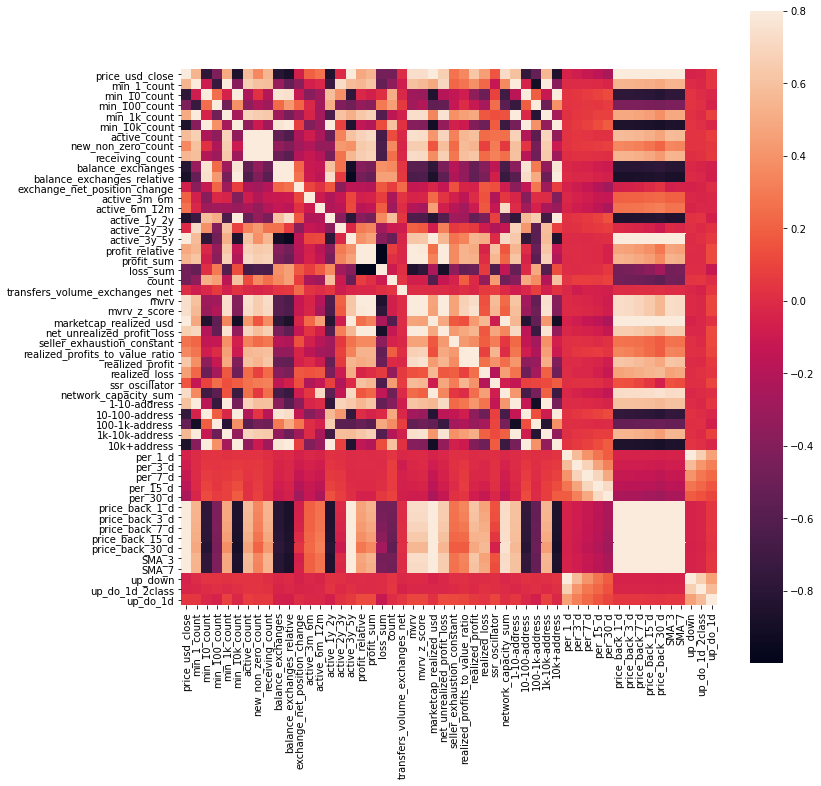

In [17]:
#correlation matrix
#pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#df1_9 = df.iloc[:,1:10]
# corrmat = df2.iloc[:,:-1].corr().abs()
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.savefig('/Users/song/Desktop/MScProject/data/corrmat2.png')
# plt.savefig(r'G:\MScProject\data\corrmat.png')
#df1_9
corrmat
# corrmat.to_csv(r'G:\MScProject\data\corrmat.csv')
corrmat.to_csv('/Users/song/Desktop/MScProject/data/corrmat.csv')

In [18]:
corrmat


,price_usd_close,min_1_count,min_10_count,min_100_count,min_1k_count,min_10k_count,active_count,new_non_zero_count,receiving_count,balance_exchanges,...,price_back_1_d,price_back_3_d,price_back_7_d,price_back_15_d,price_back_30_d,SMA_3,SMA_7,up_down,up_do_1d_2class,up_do_1d
price_usd_close,1.000000,0.542632,-0.768589,-0.429563,0.500155,-0.852856,0.577369,0.356110,0.548879,-0.811912,...,0.998201,0.994824,0.987114,0.970990,0.940949,0.999022,0.996700,-0.045938,-0.035008,0.044977
min_1_count,0.542632,1.000000,-0.086901,-0.725630,0.863343,-0.383251,0.663649,0.601462,0.589055,-0.314818,...,0.540855,0.537509,0.531096,0.518549,0.492883,0.540866,0.537277,-0.002042,-0.015975,0.041067
min_10_count,-0.768589,-0.086901,1.000000,0.245332,-0.049340,0.863757,-0.226246,0.026119,-0.205724,0.764834,...,-0.771110,-0.775375,-0.783669,-0.796830,-0.820810,-0.772524,-0.779448,0.027191,0.001053,-0.028797
min_100_count,-0.429563,-0.725630,0.245332,1.000000,-0.485075,0.385732,-0.353437,-0.222328,-0.293100,0.240643,...,-0.429532,-0.428331,-0.428163,-0.432117,-0.447035,-0.428851,-0.427035,0.030284,0.018644,-0.043621
min_1k_count,0.500155,0.863343,-0.049340,-0.485075,1.000000,-0.260996,0.683469,0.658402,0.632647,-0.285706,...,0.496491,0.488859,0.473598,0.444745,0.383067,0.496188,0.487907,0.021225,-0.008002,0.084680
min_10k_count,-0.852856,-0.383251,0.863757,0.385732,-0.260996,1.000000,-0.340391,-0.103084,-0.293334,0.767343,...,-0.853830,-0.855631,-0.859972,-0.867680,-0.886036,-0.855043,-0.859259,0.033407,0.016868,-0.015318
active_count,0.577369,0.663649,-0.226246,-0.353437,0.683469,-0.340391,1.000000,0.914737,0.947317,-0.538746,...,0.575851,0.566852,0.548538,0.519472,0.472137,0.574855,0.566063,0.029772,0.033195,0.075927
new_non_zero_count,0.356110,0.601462,0.026119,-0.222328,0.658402,-0.103084,0.914737,1.000000,0.955782,-0.335854,...,0.352596,0.340311,0.318033,0.276984,0.211174,0.350603,0.338314,0.027041,0.032395,0.049248
receiving_count,0.548879,0.589055,-0.205724,-0.293100,0.632647,-0.293334,0.947317,0.955782,1.000000,-0.505447,...,0.546728,0.537372,0.519767,0.487305,0.433993,0.545713,0.536754,0.012430,0.025333,0.060436
balance_exchanges,-0.811912,-0.314818,0.764834,0.240643,-0.285706,0.767343,-0.538746,-0.335854,-0.505447,1.000000,...,-0.811052,-0.809461,-0.806438,-0.798319,-0.781171,-0.812144,-0.812592,-0.020102,-0.041067,-0.063330


In [19]:
temp_df = corrmat.loc[['price_usd_close','price_back_1_d', 'price_back_3_d', 'price_back_7_d', 'price_back_15_d',
       'price_back_30_d']]
# corrmat.iloc[:1,:]
col = corrmat.columns
ind = corrmat.index
feature_list = []

for i in range(len(col)):
    for ele in temp_df.iloc[:,i]:
#         if 0.5<= ele <=0.8:
          if 0.5<= abs(ele):
            feature_list.append(ind[i])
            break
            
            
#feature to remove

#add necessary features
feature_list.extend(['price_usd_close','up_do_1d','up_do_1d_2class']) 
            
df_select = norm_df[feature_list]

#add necessary features

# df_select.to_csv('/Users/song/Desktop/MScProject/data/raw_col_norm.csv')

            
            
    
    
    
    

In [20]:
df_select.columns

Index(['price_usd_close', 'price_usd_close', 'min_1_count', 'min_10_count',
       'min_1k_count', 'min_10k_count', 'active_count', 'receiving_count',
       'balance_exchanges', 'balance_exchanges_relative', 'active_1y_2y',
       'active_3y_5y', 'profit_sum', 'count', 'mvrv', 'mvrv_z_score',
       'marketcap_realized_usd', 'net_unrealized_profit_loss',
       'realized_profit', 'realized_loss', 'network_capacity_sum',
       '1-10-address', '10-100-address', '100-1k-address', '1k-10k-address',
       '10k+address', 'price_back_1_d', 'price_back_3_d', 'price_back_7_d',
       'price_back_15_d', 'price_back_30_d', 'SMA_3', 'SMA_7',
       'price_usd_close', 'price_usd_close', 'up_do_1d', 'up_do_1d_2class'],
      dtype='object')

In [ ]:
price_usd_close,up_do_1d,up_do_1d_2class

In [21]:
df.columns

Index(['price_usd_close', 'min_1_count', 'min_10_count', 'min_100_count',
       'min_1k_count', 'min_10k_count', 'active_count', 'new_non_zero_count',
       'receiving_count', 'balance_exchanges', 'balance_exchanges_relative',
       'exchange_net_position_change', 'active_3m_6m', 'active_6m_12m',
       'active_1y_2y', 'active_2y_3y', 'active_3y_5y', 'profit_relative',
       'profit_sum', 'loss_sum', 'count', 'transfers_volume_exchanges_net',
       'mvrv', 'mvrv_z_score', 'marketcap_realized_usd',
       'net_unrealized_profit_loss', 'seller_exhaustion_constant',
       'realized_profits_to_value_ratio', 'realized_profit', 'realized_loss',
       'ssr_oscillator', 'network_capacity_sum', '1-10-address',
       '10-100-address', '100-1k-address', '1k-10k-address', '10k+address',
       'per_1_d', 'per_3_d', 'per_7_d', 'per_15_d', 'per_30_d',
       'price_back_1_d', 'price_back_3_d', 'price_back_7_d', 'price_back_15_d',
       'price_back_30_d', 'SMA_3', 'SMA_7', 'up_down', 'up_do_

In [22]:
df_select

,price_usd_close,price_usd_close,min_1_count,min_10_count,min_1k_count,min_10k_count,active_count,receiving_count,balance_exchanges,balance_exchanges_relative,...,price_back_3_d,price_back_7_d,price_back_15_d,price_back_30_d,SMA_3,SMA_7,price_usd_close,price_usd_close,up_do_1d,up_do_1d_2class
time_real,,,,,,,,,,,,,,,,,,,,,
2019-01-30,3485.319057,0.001320,0.001388,0.449219,0.044183,0.461538,0.131128,0.157291,0.375169,0.615332,...,0.002899,0.002875,0.003564,0.005308,0.000690,0.001365,3485.319057,0.001320,0,-1
2019-01-31,3457.191859,0.000882,0.000000,0.374199,0.047128,0.461538,0.166722,0.200676,0.394824,0.633195,...,0.001118,0.003185,0.003986,0.006860,0.000610,0.001024,3457.191859,0.000882,1,1
2019-02-01,3488.654677,0.001372,0.003165,0.370949,0.047128,0.538462,0.195515,0.226422,0.398165,0.635837,...,0.000723,0.003139,0.004350,0.008455,0.000830,0.000763,3488.654677,0.001372,1,1
2019-02-02,3526.768521,0.001966,0.006950,0.368782,0.048601,0.538462,0.067233,0.080558,0.389805,0.627613,...,0.001320,0.003134,0.003943,0.006792,0.001050,0.000590,3526.768521,0.001966,0,-1
2019-02-03,3461.496721,0.000949,0.010830,0.370588,0.050074,0.538462,0.029465,0.031463,0.392468,0.629684,...,0.000882,0.002899,0.005117,0.007130,0.001072,0.000302,3461.496721,0.000949,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,36656.193822,0.518093,0.863732,0.108333,0.480118,0.205128,0.541341,0.512086,0.084097,0.049592,...,0.514729,0.605009,0.599951,0.736104,0.516578,0.564427,36656.193822,0.518093,1,1
2022-01-25,36946.238283,0.522612,0.862266,0.103006,0.490427,0.179487,0.451235,0.486014,0.080925,0.046676,...,0.492867,0.607149,0.598541,0.738542,0.526676,0.551925,36946.238283,0.522612,-1,-1
2022-01-26,36851.369880,0.521134,0.864094,0.099937,0.487482,0.179487,0.440736,0.477101,0.066200,0.033828,...,0.511841,0.597169,0.612589,0.735497,0.529830,0.540681,36851.369880,0.521134,1,1


In [23]:
# feature_list

In [24]:
# corrmat.loc[['price_usd_close','price_back_1_d', 'price_back_3_d', 'price_back_7_d', 'price_back_15_d',
#        'price_back_30_d',]]

In [169]:
# norm_df.iloc[:,0]